In this project, we'll see how linear models work if the data having features are with different variances. Support Vector Machines (SVM) and Logistic Regression (LR) algorithms are used as linear models. We'll also see the usage of Data Standardization and how it solves different variance features problem and gives accurate results (accurate feature importances)

In [1]:
# required imports
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.linear_model import SGDClassifier # for svm and lr algorithms
from sklearn.preprocessing import StandardScaler # for standardizing the data

In [3]:
# reading the data csv file

data = pd.read_csv('E:/GITHUB REPOS/effect-of-data-having-features-with-different-variances/data_with_different_feature_variances.csv')
data = data.iloc[:,1:]

print(data.head())

            f1            f2        f3    y
0  -195.871045 -14843.084171  5.532140  1.0
1 -1217.183964  -4068.124621  4.416082  1.0
2     9.138451   4413.412028  0.425317  0.0
3   363.824242  15474.760647  1.094119  0.0
4  -768.812047  -7963.932192  1.870536  0.0


In [9]:
# printing the correlation of features with the label 'y' and also printing the standard deviation of the data

print(data.corr()['y'])
print('\n')
print(data.std())

f1    0.067172
f2   -0.017944
f3    0.839060
y     1.000000
Name: y, dtype: float64


f1      488.195035
f2    10403.417325
f3        2.926662
y         0.501255
dtype: float64


<b>Observation :- </b> Fetaure 'f3' is highly correlated with the label 'y' and has least standard deviation amongst f1,f2,f3.

In [10]:
# splitting the data into X(features f1,f2,f3) and y(label)

X=data[['f1','f2','f3']].values
y=data['y'].values

print(X.shape)
print(y.shape)

(200, 3)
(200,)


<h1>1. Without Data Standardization</h1>

<h2>1.1 Logistic Regression (SGD Classifier with Logloss)</h2>

Feature f1 score is :  11070.275564782807
Feature f2 score is :  -13901.807078828466
Feature f3 score is :  9221.654056354826


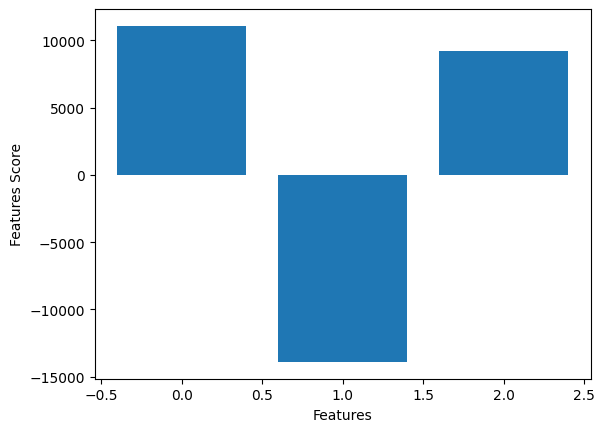

In [13]:
# loss='log' denotes Logistic Regression and penalty='l2' denotes L2 regularization
clf1 = SGDClassifier(loss='log', penalty='l2')

# training the model/classifier
clf1.fit(X,y)

# coef_ are nothing but the weights assigned to the features, so we can consider their values as a measure of feature importance(for linear models)
# reference - https://machinelearningmastery.com/calculate-feature-importance-with-python/
imp_features = clf1.coef_[0]

# printing the features and their corresponding values
# 0th index(first feature), 1st index(second feature), 2nd index(third feature)
print('Feature f1 score is : ', imp_features[0])
print('Feature f2 score is : ', imp_features[1])
print('Feature f3 score is : ', imp_features[2])

# plotting the feature importance values on bar graph
plt.bar([x for x in range(len(imp_features))], imp_features)

plt.xlabel('Features')
plt.ylabel('Features Score')

plt.show()

<h2>1.2 SVM (SGD Classifier with hinge loss)</h2>

Feature f1 score is :  3370.3580271414594
Feature f2 score is :  -12120.653905895764
Feature f3 score is :  10724.13991642756


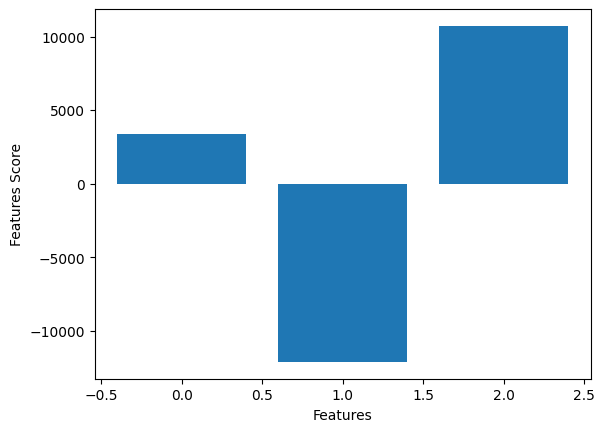

In [16]:
# loss='hinge' denotes Support Vector Machines and penalty='l2' denotes L2 regularization
clf2 = SGDClassifier(loss='hinge', penalty='l2')

# training the model/classifier
clf2.fit(X,y)

# coef_ are nothing but the weights assigned to the features, so we can consider their values as a measure of feature importance(for linear models)
# reference - https://machinelearningmastery.com/calculate-feature-importance-with-python/
imp_features = clf2.coef_[0]

# printing the features and their corresponding values
# 0th index(first feature), 1st index(second feature), 2nd index(third feature)
print('Feature f1 score is : ', imp_features[0])
print('Feature f2 score is : ', imp_features[1])
print('Feature f3 score is : ', imp_features[2])

# plotting the feature importance values on bar graph
plt.bar([x for x in range(len(imp_features))], imp_features)

plt.xlabel('Features')
plt.ylabel('Features Score')

plt.show()

<h2>Observation :-</h2>
1. In Logistic Regression, Feature 2(f2) with negative sign has the highest value whereas in SVM, Feature 2(f2) with negative sign has the highest value. So, due to different variance of features, we are getting uninterpretable feature importances.<br><br>
2. Feature 3 should get the highest feature importance as Feature 3 is the most correlated feature to the variable y.(f3 = 0.839060 which is highly correlated) compared to other 2 features(f1 = 0.067172 and f2 = -0.017944)

<h1>2. With Data Standardization</h1>

<h2>2.1 Logistic Regression (SGD Classifier with Logloss)</h2>

Feature f1 score is :  2.4215865651559607
Feature f2 score is :  4.513194368442512
Feature f3 score is :  13.365047741400916


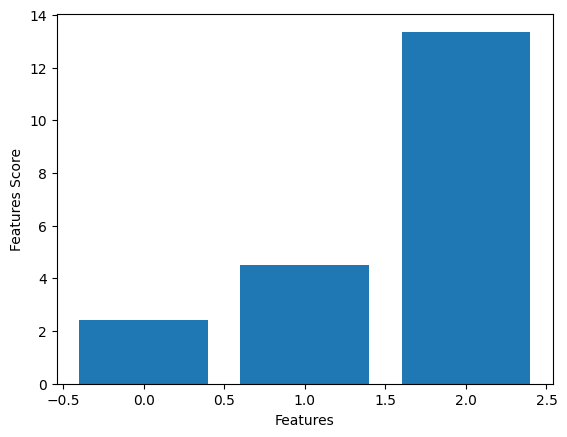

In [17]:
# In standardization, mean centering and variance scaling is done((x-μ)/σ),to obtain mean = 0 and std-dev = 1
scaler1 = StandardScaler()

# training the data/computing the mean and standard deviation 
scaler1.fit(X,y) 

# Standardizing the data by centering and scaling
scaled_data1 = scaler1.transform(X) 

# loss='log' denotes Logistic Regression and penalty='l2' denotes L2 regularization
clf1 = SGDClassifier(loss='log', penalty='l2')

# training the model/classifier on standardized data
clf1.fit(scaled_data1,y)

# coef_ are nothing but the weights assigned to the features, so we can consider their values as a measure of feature importance(for linear models)
# reference - https://machinelearningmastery.com/calculate-feature-importance-with-python/
imp_features = clf1.coef_[0]

# printing the features and their corresponding values
# 0th index(first feature), 1st index(second feature), 2nd index(third feature)
print('Feature f1 score is : ', imp_features[0])
print('Feature f2 score is : ', imp_features[1])
print('Feature f3 score is : ', imp_features[2])

# plotting the feature importance values on bar graph
plt.bar([x for x in range(len(imp_features))], imp_features)

plt.xlabel('Features')
plt.ylabel('Features Score')

plt.show()

<h2>2.2 SVM (SGD Classifier with hinge loss)</h2>

Feature f1 score is :  -2.7506137522289436
Feature f2 score is :  1.4934906475265775
Feature f3 score is :  12.279421550485994


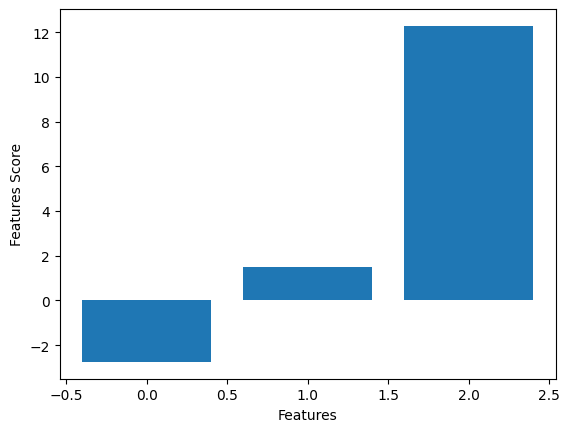

In [18]:
# loss='hinge' denotes Support Vector Machines and penalty='l2' denotes L2 regularization
clf2 = SGDClassifier(loss='hinge', penalty='l2')

# training the model/classifier on standardized data (already standardized in 2.1)
clf2.fit(scaled_data1,y)

# coef_ are nothing but the weights assigned to the features, so we can consider their values as a measure of feature importance(for linear models)
# reference - https://machinelearningmastery.com/calculate-feature-importance-with-python/
imp_features = clf2.coef_[0]

# printing the features and their corresponding values
# 0th index(first feature), 1st index(second feature), 2nd index(third feature)
print('Feature f1 score is : ', imp_features[0])
print('Feature f2 score is : ', imp_features[1])
print('Feature f3 score is : ', imp_features[2])

# plotting the feature importance values on bar graph
plt.bar([x for x in range(len(imp_features))], imp_features)

plt.xlabel('Features')
plt.ylabel('Features Score')

plt.show()

<h2>Observation :-</h2>
1. After applying Logistic Regression and SVM on standardized(In standardization, mean centering and variance scaling is done((x-μ)/σ),to obtain mean = 0 and std-dev = 1) data, we can see that feature f3 gets highest feature importance value(highest weight).<br><br>
2. Feature 3 should get the highest feature importance as Feature 3 is the most correlated feature to the variable y.(f3 = 0.839060 which is highly correlated) compared to other 2 features(f1 = 0.067172 and f2 = -0.017944)